<a href="https://colab.research.google.com/github/IR04dy/ML-models/blob/main/Neural_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [80]:
data = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = data.load_data()

In [81]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [82]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [84]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2598 - accuracy: 0.9235
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1067 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0735 - accuracy: 0.9771


In [85]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0907 - accuracy: 0.9698


In [86]:
from google.colab import files
from IPython.display import Image

In [109]:
uploaded = files.upload()

Saving 0.png to 0.png


Digit is probably 9


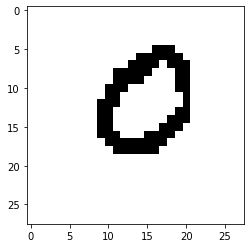

Digit is probably 3


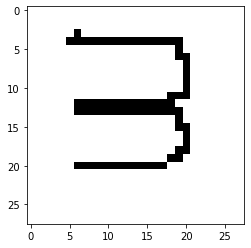

Digit is probably 2


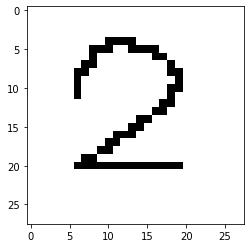

Digit is probably 8


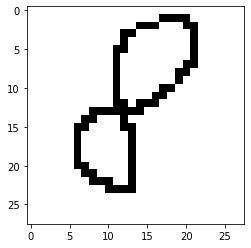

Digit is probably 5


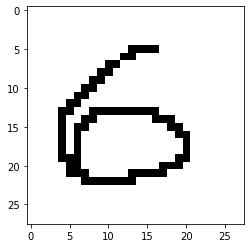

Digit is probably 5


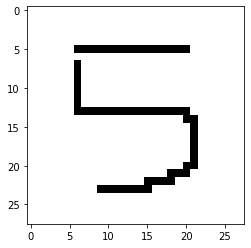

Digit is probably 1


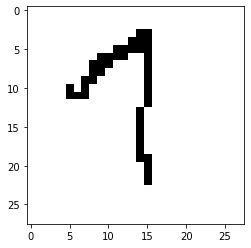

Digit is probably 4


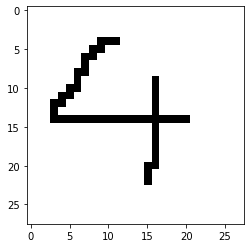

Digit is probably 4


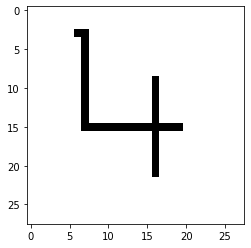

Digit is probably 7


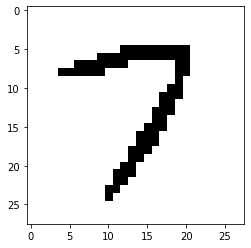

Digit is probably 9


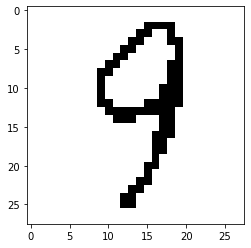

In [110]:
pointer=0
while os.path.isfile(f"{pointer}.png"):
  try:
    img = cv2.imread(f"{pointer}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"Digit is probably {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print('Error!')
  finally:
    pointer+=1